<a href="https://colab.research.google.com/github/SebastianYanezV/ADA-Informes/blob/main/Informe_7_Optimal_BST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema: Árbol binario de búsqueda óptimo

**Entrada:** Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. También, existen **claves ficticias $d_i$** que representan **búsquedas fallidas**, cada una tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida:** Construir un **árbol de búsqueda óptimo**, es decir, un árbol que **minimice la cantidad esperada de nodos visitados (costo esperado)**.

El problema que se busca resolver en esta ocasión, es el problema del árbol de búsqueda óptimo, problema que consiste en minimizar el costo esperado (cantidad de nodos visitados por búsqueda). Para lograr esto, se utilizará el algoritmo *Optimal BST*, el cuál se encarga de encontrar este costo esperado luego de analizar todos los costos posibles del árbol.

# 2. Optimal BST

## 2.1 Código

Los códigos que se muestran a continuación pertenecen a las dos implementaciones del algoritmo *OptimalBST*. Además, también se utilizará el algoritmo *optimal_bst_instance_generator* para generar instancias con las que trabajar y también el algoritmo *generate_binary_tree* para generar un árbol a partir de un arreglo.

In [203]:
import random
import numpy as np
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q

In [204]:
nullnodes = 0
def generate_binary_tree(T,A):
    global nullnodes
    if len(A)==1: 
      T.add_node(A[0])
      return A[0]
    else:
      pivote = random.randint(0,len(A)-1)
      T.add_node(A[pivote])

      if pivote > 0:
        left_node = generate_binary_tree(T,A[0:pivote])
        T.add_edge(A[pivote],left_node)
      elif pivote ==0: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1
      
      if pivote < len(A)-1:
        right_node = generate_binary_tree(T,A[pivote+1:])
        T.add_edge(A[pivote],right_node)
      else: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1

      return A[pivote]

In [205]:
nullnodes = 0
def generate_binary_tree_mayorEnRaiz(T,A,freq):
    global nullnodes
    if len(A)==1: 
      T.add_node(A[0])
      return A[0]
    else:
      freqMayor = max(freq)
      pos = freq.index(freqMayor)
      pivote = pos
      T.add_node(A[pivote])

      if pivote > 0:
        left_node = generate_binary_tree(T,A[0:pivote])
        T.add_edge(A[pivote],left_node)
      elif pivote ==0: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1
      
      if pivote < len(A)-1:
        right_node = generate_binary_tree(T,A[pivote+1:])
        T.add_edge(A[pivote],right_node)
      else: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1

      return A[pivote]

### 2.1.1 Optimal BST recursivo

Claves: [9, 88, 98]
Prob claves: [0.0274921022443914, 0.15061236612489673, 0.048028538713442065]
Prob claves ficticias: [0.12552264 0.20072001 0.22107936 0.22654498]
Costo mínimo del Optimal BST: 0.30165364804056366
LLamadas recursivas realizadas: 14


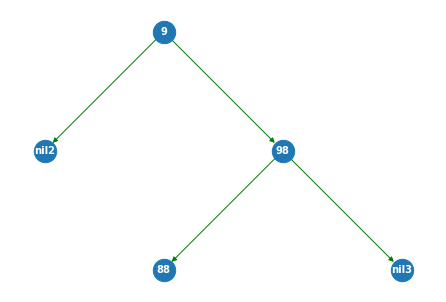

In [103]:
llamadas = 0

def optimalBSTRecursivo(keys, freq, i, j, verbose = False, visualize = False):
  if (j < i): 
    if verbose == True: print(f"No hay elementos en el sub-arreglo que va desde la posición {i} hasta la {j}. Se retorna 0.")
    return 0 #Si j < i, entonces no hay elementos en este sub-arreglo
  if (j == i): 
    if verbose == True: print(f"Único elemento encontrado en el sub-arreglo {freq[i:j+1]}: {freq[i]}. Se retorna este elemento.")
    return freq[i] #Si j es igual a i, entonces sólo hay un elemento en este sub-arreglo
	
  if verbose == True: print(f"Arreglo de frecuencias en la llamada recursiva actual: {freq[i:j+1]}")
  suma = 0
  for k in range(i, j + 1): suma += freq[k]
  sumaFrecuencias = suma

  if verbose == True: print("Suma de frecuencias:", sumaFrecuencias)
	
  valorMin = 999999999999 
	
  #Se considera a cada elemento como la raíz y se busca recursivamente el costo de su BST
  #Luego de compara con el costo mínimo y este se actualiza de ser necesario
  for k in range(i, j + 1):
    global llamadas 
    llamadas += 2

    if verbose == True: print("-------------------------------------------------------------------------------------------------------")
    costo = optimalBSTRecursivo(keys, freq, i, k - 1) + optimalBSTRecursivo(keys, freq, k + 1, j)

    if verbose == True: print("Costo encontrado:", costo)

    if (costo < valorMin): 
      if verbose == True: print(f"El costo encontrado es menor que el menor costo almacenado. {costo} < {valorMin}")
      valorMin = costo
      if verbose == True: print("Nuevo menor costo:", valorMin)
	
  if verbose == True: print(f"Menor costo esperado encontrado: {valorMin + sumaFrecuencias} (Menor costo: {valorMin}) + (Suma de frecuencias: {sumaFrecuencias})")

  return valorMin + sumaFrecuencias

#Ejemplo
keys, p, q = optimal_bst_instance_generator(3)

T = nx.DiGraph()
generate_binary_tree(T,keys)
pos = graphviz_layout(T, prog="dot")
nx.draw(T,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width=1.0, edge_color ="green")

n = len(keys)
print("Claves:", keys)
print("Prob claves:", p)
print("Prob claves ficticias:", q)
print("Costo mínimo del Optimal BST:", optimalBSTRecursivo(keys, p, 0, n - 1))
print("LLamadas recursivas realizadas:", llamadas)

### 2.1.2 Optimal BST bottom-up

Claves: [40, 50, 92]
Prob claves: [0.00832506781937789, 0.06748522805367334, 0.12905328276247616]
Prob claves ficticias: [0.31716243 0.27273484 0.03801727 0.16722188]
Costo mínimo del Optimal BST: 0.28899894232795653
Cantidad de sub-problemas resueltos: 7


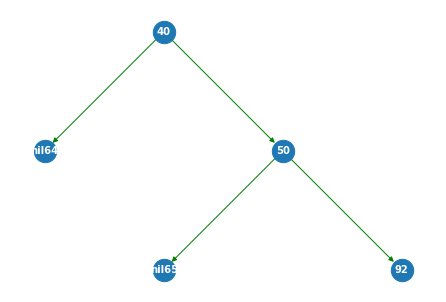

In [202]:
subProblemas = 0

def optimalBSTDinamico(keys, freq, n, verbose = False, visualize = False):
  #Se crea una matriz de tamaño n x n y se inicializa con 0s
  costo = [[0 for x in range(n)] for y in range(n)]

  if verbose == True: print(f"Se crea una matriz cuadrada de tamaño {n}: {costo}")

  for i in range(n): costo[i][i] = freq[i]

  if verbose == True:
    print(f"Se insertan las frecuencias en la matriz (en la diagonal principal).")
    print(f"{costo[0]}\n{costo[1]}\n{costo[2]}")
    print("-------------------------------------------------------------------------------------------------------")

  #Se consideran cadenas de largo 2 hasta n + 1
  for L in range(2, n + 1):
    #i es la fila actual de la matriz
    for i in range(n - L + 1):
      #j es la columna de la matriz
      j = i + L - 1
      if verbose == True: print(f"Fila = {i}, Columna = {j}")

      suma = 0
      for k in range(i, j + 1): suma += freq[k]

      if verbose == True: print(f"Se calcula la suma de las frecuencias: {suma}")

      if (i >= n or j >= n): break

      costo[i][j] = 999999999999

      if verbose == True: print(f"A continuación se calculará el costo de cada árbol al llevar la(s) clave(s) {keys[i:j+1]} a la raíz.")

      for r in range(i, j + 1):
        global subProblemas
        subProblemas += 1

        #Se va calculando el costo de tener cada clave en la raíz
        c = 0
        if (r > i): c += costo[i][r-1]
        if (r < j): c += costo[r+1][j]
        c += suma

        if verbose == True: 
          print(f"El costo cuándo {keys[r]} es la raíz del árbol es igual a {c}.")
          print(f"Si el costo encontrado es menor al menor costo almacenado, entonces este último se actualiza.")

        #Si el costo calculado es menor que el menor costo almacenado, entonces se actualiza este valor
        if (c < costo[i][j]): 
          if verbose == True: 
            print(f"{c} (costo calculado) < {costo[i][j]} (menor costo almacenado).")
            print(f"{c} es el nuevo menor costo encontrado.")
          costo[i][j] = c
        else:
          if verbose == True: print("El costo encontrado no es menor que el menor costo almacenado.")
      
      if verbose == True: print("-------------------------------------------------------------------------------------------------------")
  
  return costo[0][n-1]

#Ejemplo
keys, p, q = optimal_bst_instance_generator(3)

T = nx.DiGraph()
a = generate_binary_tree(T,keys)
pos = graphviz_layout(T, prog="dot")
nx.draw(T,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width=1.0, edge_color ="green")

n = len(keys)
print("Claves:", keys)
print("Prob claves:", p)
print("Prob claves ficticias:", q)
print("Costo mínimo del Optimal BST:", optimalBSTDinamico(keys, p, n))
print("Cantidad de sub-problemas resueltos:", subProblemas)

## 2.2 Descripción del algoritmo

### 2.2.1 Descripción del algoritmo recursivo

Antes de empezar a buscar el costo esperado, el algoritmo recibe un arreglo de frecuencias y el largo del arreglo de claves. 

1. La función *optimalBSTRecursivo* recibe el arreglo de frecuencias y dos índices que servirán para recorrer las posiciones de este arreglo.

2. Se verifica si el arreglo no tiene elementos o si sólo tiene uno, esto debido a que no se deben realizar cálculos en estos casos, por lo que se retorna 0 o el único elemento de la frecuencia respectivamente.

3. Se suman todas las frecuencias del arreglo.

4. Se calcula el costo de cada BST posible de forma recursiva. 

5. Si el nuevo costo encontrado es menor que el menor costo almacenado, entonces este valor se debe actualizar.

Finalmente, al terminar el proceso anterior, se retorna el menor costo encontrado sumado a la suma de las frecuencias, lo que es igual al costo óptimo esperado.



### 2.2.2 Descripción del algoritmo bottom-up

Antes de empezar a buscar el costo esperado, el algoritmo recibe los arreglos de claves y de frecuencias y el largo del arreglo de claves. 

1. Se crea una matriz de tamaño n x n inicializada con 0s y se le ingresan las frecuencias de cada clave en su diagonal principal.

2. Se empieza a recorrer la matriz usando los índices $i$ y $j$.

3. Se calcula la suma de las frecuencias que van desde la posición $i$ hasta $j + 1$ del arreglo de frecuencias.

4. Se empieza a calcular el costo de tener cada clave del arreglo de claves en la raíz del árbol.

5. Cada vez que se calcula un costo, se debe revisar si este es menor o mayor que el menor costo calculado hasta el momento. De ser menor, este valor se debe actualizar.

Finalmente, se retorna el menor costo encontrado.


## 2.3 Ejemplo

Nota: en el siguiente ejemplo se muestra el funcionamiento del algoritmo en su versión de programación dinámica, ya que esta es mucho más eficiente que su versión recursiva.

Se ingresan los siguientes arreglos de claves y frecuencias y el largo del arreglo de claves.

Claves = [1, 8, 23]

Freq = [0.19, 0.15, 0.26]

Largo = 3

Se crea e inicializa una matriz cuadrada de tamaño 3:

[0, 0, 0]

[0, 0, 0]

[0, 0, 0]


Se ingresan las frecuencias en forma de diagonal a la matriz:

[0.19, 0, 0]

[0, 0.15, 0]

[0, 0, 0.26]


Se recorre desde 2 hasta 4. Se recorre con L:

1. Se recorre desde 0 hasta 2. Esto representa las filas de la matriz. Se recorre con i.

2. Se calcula la columna actual, en este caso es igual 1.

3. Se suman las frecuencias de las claves que van desde 0 hasta 2.

  Suma = 0.6

4. Se recorre desde 0 hasta 2 para calcular los costos. Se recorre con r.

5. Se inicializa el costo actual en 0.

  Costo = 0

6. r es menor que j (0 < 1), por lo que al costo se le suma el valor almacenado en la posición (1,1) de la matriz.

  Costo = 0.15

7. Al costo se le suma la suma de frecuencias anteriormente calculada:

  Costo = 0.75

8. Si el costo calculado es menor que el menor costo almacenado, entonces este costo se almacena como el nuevo menor costo encontrado. Como es el primer cálculo, entonces este costo es igual al menor costo encontrado.

El proceso anteriormente descrito se repite hasta terminar de procesar cada caso posible. Finalmente, se retorna el menor costo encontrado, en este caso, 1.05.

## 2.4 Ejecución del algoritmo paso a paso

### 2.4.1 Optimal BST recursivo

In [102]:
llamadas = 0
keys, p, q = optimal_bst_instance_generator(3)
n = len(keys)
print("Claves:", keys)
print("Prob claves:", p)
print("Prob claves ficticias:", q)
print("-------------------------------------------------------------------------------------------------------")
costoMinimoEncontrado = optimalBSTRecursivo(keys, p, 0, n - 1, verbose = True)
print("-------------------------------------------------------------------------------------------------------")
print("Costo mínimo del Optimal BST:", costoMinimoEncontrado)
print("LLamadas recursivas realizadas:", llamadas)

Claves: [19, 26, 80]
Prob claves: [0.2873961109201554, 0.013129871045020983, 0.025950788246886798]
Prob claves ficticias: [0.21309115 0.09040795 0.2567504  0.11327372]
-------------------------------------------------------------------------------------------------------
Arreglo de frecuencias en la llamada recursiva actual: [0.2873961109201554, 0.013129871045020983, 0.025950788246886798]
Suma de frecuencias: 0.32647677021206317
-------------------------------------------------------------------------------------------------------
No hay elementos en el sub-arreglo que va desde la posición 0 hasta la -1. Se retorna 0.
Arreglo de frecuencias en la llamada recursiva actual: [0.013129871045020983, 0.025950788246886798]
Suma de frecuencias: 0.03908065929190778
-------------------------------------------------------------------------------------------------------
No hay elementos en el sub-arreglo que va desde la posición 1 hasta la 0. Se retorna 0.
Único elemento encontrado en el sub-arreg

Como se puede ver en el ejemplo anterior, la versión recursiva de este algoritmo va calculando el menor costo esperado a medida que suma el menor costo encontrado a la suma de frecuencias  en cada llamada recursiva. Esto lo realiza con el fin de calcular el costo mínimo de cada BST posible, para luego quedarse con el menor costo encontrado.

### 2.4.2 Optimal BST bottom-up

In [110]:
subProblemas = 0
keys, p, q = optimal_bst_instance_generator(3)
n = len(keys)
print("Claves:", keys)
print("Prob claves:", p)
print("Prob claves ficticias:", q)
print("-------------------------------------------------------------------------------------------------------")
costoMinimoEncontrado = optimalBSTDinamico(keys, p, n, verbose = True, visualize = True)
print("Costo mínimo del Optimal BST:", costoMinimoEncontrado)
print("Cantidad de sub-problemas resueltos:", subProblemas)

Claves: [30, 37, 42]
Prob claves: [0.1556860267425573, 0.28501008568218367, 0.04787613052718962]
Prob claves ficticias: [0.2155235  0.13405004 0.09516687 0.06668735]
-------------------------------------------------------------------------------------------------------
Se crea una matriz cuadrada de tamaño 3: [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
Se insertan las frecuencias en la matriz (en la diagonal principal).
[0.1556860267425573, 0, 0]
[0, 0.28501008568218367, 0]
[0, 0, 0.04787613052718962]
-------------------------------------------------------------------------------------------------------
Fila = 0, Columna = 1
Se calcula la suma de las frecuencias: 0.44069611242474094
A continuación se calculará el costo de cada árbol al llevar la(s) clave(s) [30, 37] a la raíz.
El costo cuándo 30 es la raíz del árbol es igual a 0.7257061981069246.
Si el costo encontrado es menor al menor costo almacenado, entonces este último se actualiza.
0.7257061981069246 (costo calculado) < 999999999999 (meno

Como se puede ver en el ejemplo anterior, la versión dinámica de este algoritmo se encarga de crear una matriz cuadrada en la que inserta las frecuencias de cada clave, para luego empezar a recorrer esta matriz, junto al arreglo de claves, proceso que le permite calcular cada costo posible. Además, cada vez que encuentra un nuevo costo, lo compara con el menor costo encontrado para verificar si este es menor o no.

# 3. Tiempo de ejecución

## 3.1 Tiempo de ejecución Optimal BST recursivo

Al ser una implementación recursiva, se resolverán distintos sub-problemas cada vez de forma repetida, además, la cantidad de árboles binarios que se pueden formar con $n$ nodos es igual a $Ω$($\frac{4^n}{n^{3/2}}$), función que representa la cantidad de sub-problemas que se deben resolver en función del tamaño de entrada.

Debido a lo anterior, el tiempo de ejecución de este algoritmo es exponencial en $n$, siendo igual a ${\displaystyle{2n \choose n}{\frac {1}{n+1}}}$.

Por otro lado, la complejidad espacial del algoritmo es de $O(1)$ ya que no utiliza estructuras auxiliares para almacenar información.




## 3.2 Tiempo de ejecución Optimal BST bottom-up

Al ser una implementación dinámica, sólo se resolverá cada sub-problema una sola vez, a diferencia de la implementación recursiva, en la cuál cada sub-problema se puede llegar a resolver múltiples veces. Por esta razón, la cantidad de sub-problemas que se deberán resolver en función del tamaño del problema de entrada será igual a:

$C_{ij} = min_{T{i...j}} C(T)$, donde $C(T)$ representa el costo del árbol y donde cada sub-problema posee un tiempo de ejecución de $O(n)$.

Debido a lo anterior, y sumado a que este algoritmo posee tres ciclos anidados que iteran un aproximado de $n$ veces cada uno, el tiempo de ejecución de este algoritmo es igual a $O(n^3)$.

Por otro lado, la complejidad espacial del algoritmo es de $O(n^2)$ ya que utiliza una matriz cuadrada para almacenar información.


# 4. Correctitud Optimal BST bottom-up

##Sub-estructura óptima

La sub-estructura óptima de este problema consiste en encontrar el coste del árbol mínimo para la secuencia de claves que se ingresan. Para resolver esto, se deben resolver diversos sub-problemas, en donde cada uno consiste en seleccionar cada clave ingresada y usarla como nodo raíz, para luego obtener su coste mínimo. Finalmente, luego de resolver cada sub-problema, se puede obtener el coste mínimo del problema principal, ya que sólo se deberá escoger el menor costo encontrado de los sub-problemas como la solución final.

El costo de árbol original y el costo de cada sub-problema se pueden ver en las siguientes fórmulas respectivamente:

$C(T)=\sum\limits_{l=i}^{j}p_l(depth_T(l)+1)$

$C_{ij} = min_{T{i...j}} C(T)$

##Función recurrente para el valor óptimo del problema

Si la fórmula del costo del árbol óptimo se simplifica, entonces se obtiene la siguiente función de recurrencia:

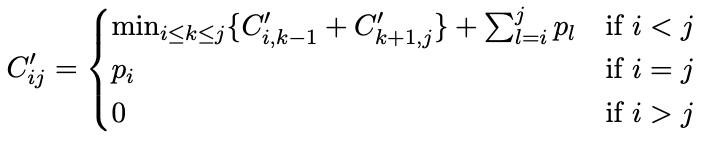

## Teorema: correctitud del algoritmo Optimal BST bottom-up

El algoritmo $OptimalBST$ recibe un arreglo de claves y de sus frecuencias y retorna el costo mínimo del árbol de búsqueda óptimo que se forma.

## Prueba del teorema

Para poder probar el teorema anterior, se utilizará inducción matemática:

**Caso base (n = 1)**

Cuándo el arreglo de entrada es de tamaño 1, entonces el costo mínimo que se retorna es igual a la frecuencia del único elemento existente en el arreglo de entrada.

**Paso inductivo (n > 1)**

Cuándo el arreglo de entrada es de un tamaño n > 1, se empieza a iterar con el fin de encontrar cada costo mínimo posible que se pueda obtener. Lo anterior debido a que se busca llevar cada clave del arreglo hacia la raíz para así calcular el costo del árbol que esta forma. Para esto existen dos casos posibles:

1. $C_{ij} ≤ C´_{ij}$: para este caso, $C´_{ij}$ es el costo de algún árbol binario de búsqueda entre $i...j$ y $C_{ij}$ sería el costo de un árbol binario de búsqueda óptimo. 

2. $C_{ij} ≥ C´_{ij}$: supongamos que la raíz del árbol de búsqueda óptimo es $k$, entonces:

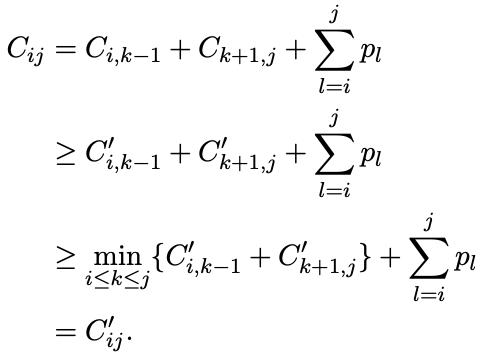

**Correctitud**

Finalmente, como tanto el caso base como el paso inductivo son correctos, se concluye que el teorema de correctitud es verdadero.

## Conclusión

Luego de revisar cada aspecto de la correctitud del algoritmo, se puede concluir que el último problema que resuelve el algoritmo es igual al problema original, ya que, en la última iteración del ciclo "for" intermedio, el algoritmo deberá determinar obligatoriamente cuál será el costo mínimo a retornar, ya que luego de esa iteración, se terminarán de procesar datos y se retornará un valor. A continuación se muestra un ejemplo para un mejor entendimiento.

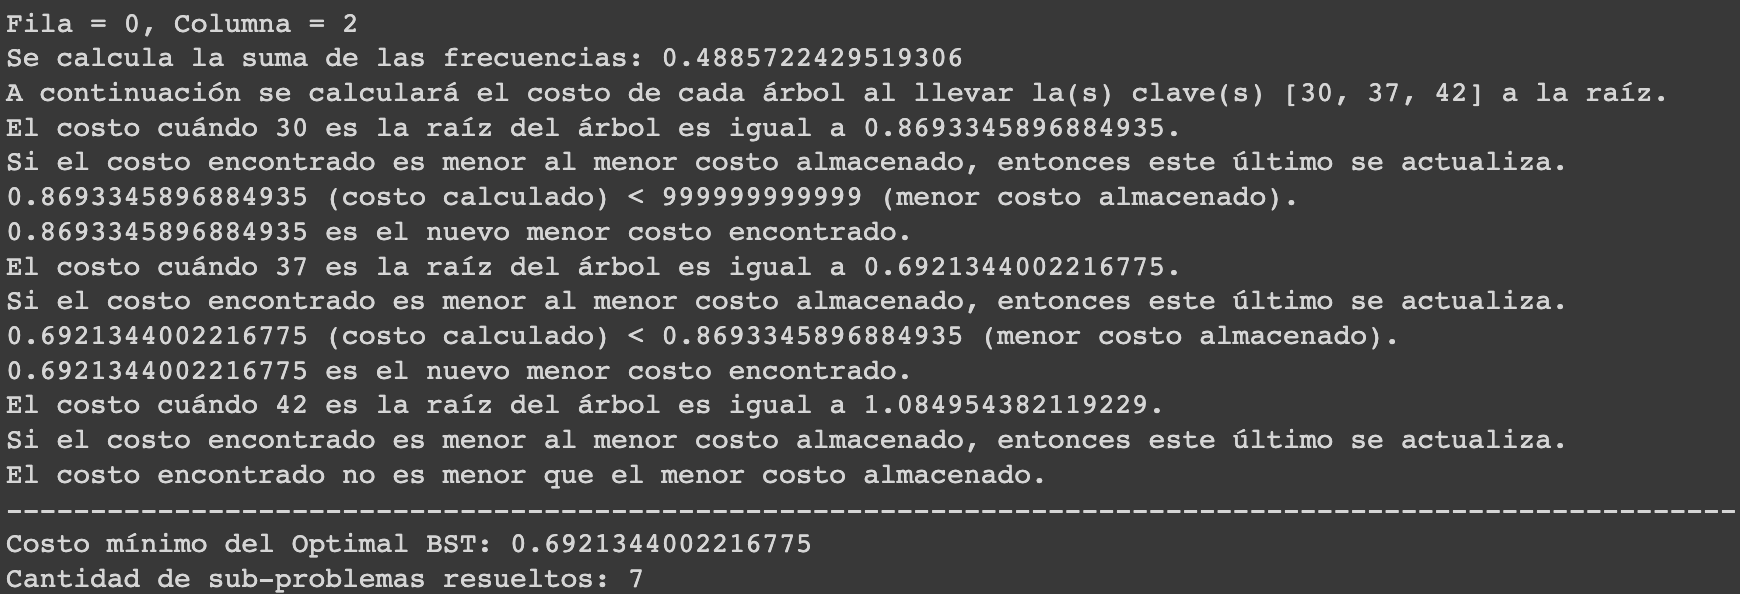

La imagen anterior representa el último problema resuelto durante el punto 2.4.2. Aquí se puede ver claramente que durante esta iteración el algoritmo debe decidir cuál es el menor costo.

# 5. Experimentos

## 5.1 Optimal BST bottom-up v/s recursivo (Tiempo de ejecución)

En los gráficos que se muestran a continuación se visualizan los tiempos de ejecución de los algoritmos Optimal BST bottom-up y Optimal BST recursivo en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 10 y 100 y 10 y 15 respectivamente.

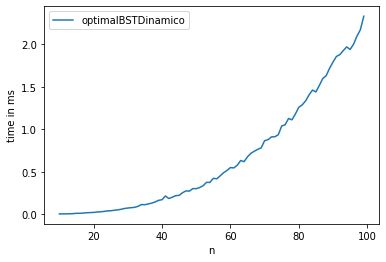

In [220]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]

for n in range(10,100):

  keys, p, q = optimal_bst_instance_generator(n)

  #la función repeat está ejecutando 20 veces optimalBSTDinamico con el arreglo y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import optimalBSTDinamico", stmt=f"optimalBSTDinamico({keys}, {p}, {n})", repeat=1, number=20)

  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["optimalBSTDinamico"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

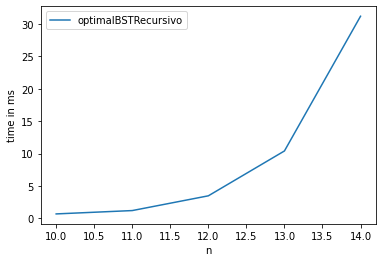

In [138]:
z=[]; w=[]

for n in range(10,15):

  keys, p, q = optimal_bst_instance_generator(n)

  #la función repeat está ejecutando 20 veces optimalBSTDinamico y optimalBSTRecursivo con el arreglo a y retorna el mejor tiempo obtenido.
  t2 = repeat(setup="from __main__ import optimalBSTRecursivo", stmt=f"optimalBSTRecursivo({keys}, {p}, {0}, {n-1})", repeat=1, number=20)

  z.append(n)
  w.append(t2)

plt.plot(z,w)
plt.legend(["optimalBSTRecursivo"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Como se puede ver en los gráficos anteriores, la versión dinámica del algoritmo es mucho más eficiente que la versión recursiva, esto debido a que la primera tiene una complejidad temporal de $O(n^3)$, a diferencia del segundo, el cuál tiene una complejidad temporal exponencial en $n$. Un ejemplo para ver lo anterior claramente es que el algoritmo implementado con bottom-up demora aproximadamente 2.5 ms en procesar un arreglo de tamaño 100, a diferencia de la versión implementada con recursividad, la cuál demora aproximadamente 30 ms para trabajar un arreglo de largo 15.

## 5.2 Optimal BST bottom-up v/s recursivo (Tiempo de ejecución y costo esperado)


### 5.2.1 Tiempo de ejecución

En los gráficos que se muestran a continuación se visualizan los tiempos de ejecución de los algoritmos Optimal BST bottom-up y Optimal BST recursivo en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 10 y 100 y 10 y 15 respectivamente. A diferencia del experimento anterior, en este caso los árboles generados tendrán al elemento con mayor frecuencia en la raíz.